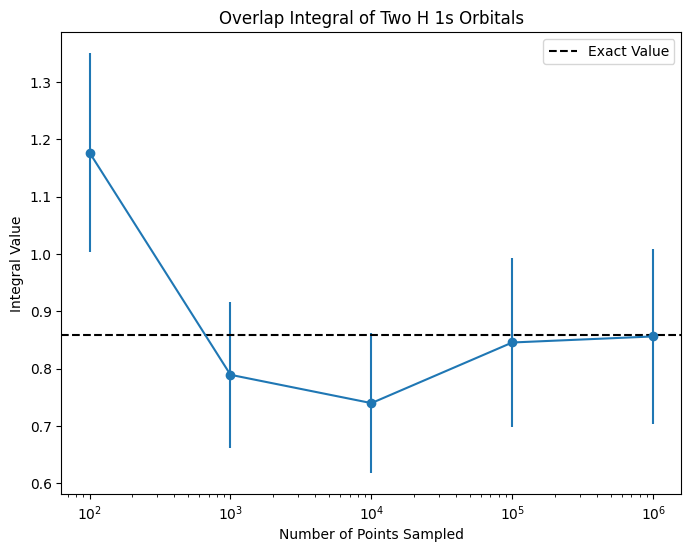

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def psi_1s(x, y, z):
    """
    Calculate the value of the 1s orbital of hydrogen at a given point.

    Parameters
    ----------
    x : float
        The x-coordinate of the point.
    y : float
        The y-coordinate of the point.
    z : float
        The z-coordinate of the point.

    Returns
    -------
    float
        The value of the 1s orbital at the given point.
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    value = (1 / (np.sqrt(np.pi))) * np.exp(-r)
    return value

# Set the random seed for reproducibility
np.random.seed(42)

# Set the number of points to sample
n_points_list = [100, 1000, 10000, 100000, 1000000]

# Set the integration limits
a = 0
b = 7

# Create lists to store the results
averages = []
std_devs = []

# Loop over the number of points to sample
for n_points in n_points_list:
    x = np.random.uniform(a, b, n_points)
    y = np.random.uniform(a, b, n_points)
    z = np.random.uniform(a, b, n_points)
    integrand = psi_1s(x + 0.5, y, z) * psi_1s(x - 0.5, y, z)
    integral = 8 * np.mean(integrand) * (b - a)**3
    variance = 8 * np.var(integrand) * (b - a)**3
    averages.append(integral)
    std_devs.append(np.sqrt(variance))

# Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(n_points_list, averages, yerr=std_devs, fmt='o-')
plt.axhline(0.858385, color='black', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two H 1s Orbitals')
plt.legend()
plt.show()

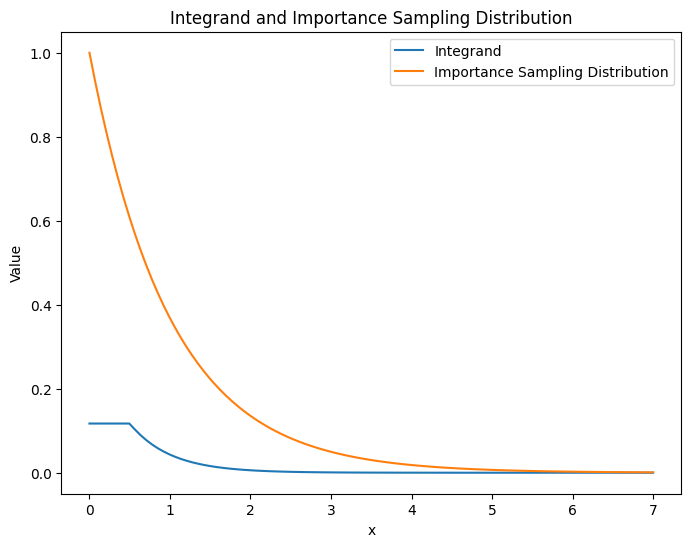

In [2]:
from scipy.stats import expon
import numpy as np

# Plot the integrand and the importance sampling distribution
x = np.linspace(0, 7, 100)
y = 0
z = 0
integrand = psi_1s(x + 0.5, y, z) * psi_1s(x - 0.5, y, z)
importance_sampling = expon.pdf(x)
plt.figure(figsize=(8, 6))
plt.plot(x, integrand, label='Integrand')
plt.plot(x, importance_sampling, label='Importance Sampling Distribution')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Integrand and Importance Sampling Distribution')
plt.legend()
plt.show()

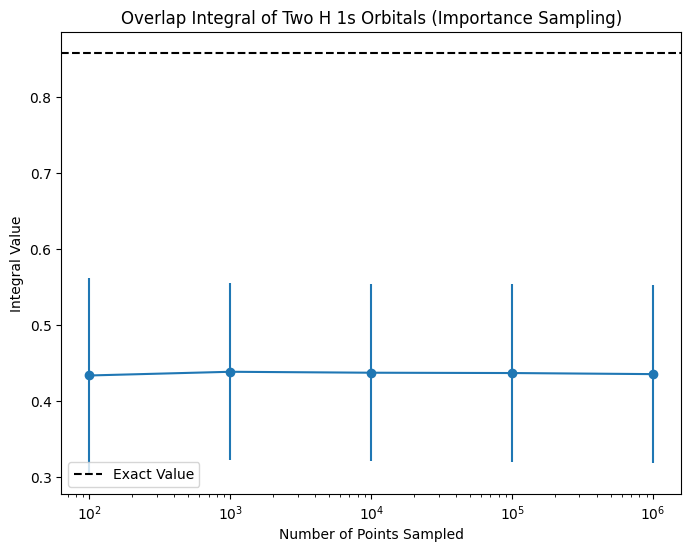

In [7]:
# Set the number of points to sample
n_points_list = [100, 1000, 10000, 100000, 1000000]

# Define the importance sampling distribution g(x, y, z)
def g_distribution(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.exp(-r)

# Create lists to store the results
averages = []
std_devs = []

# Loop over the number of points to sample
for n_points in n_points_list:
    x = expon.rvs(size=n_points, scale=1)
    y = expon.rvs(size=n_points, scale=1)
    z = expon.rvs(size=n_points, scale=1)
    numer = psi_1s(x + 0.5, y, z) * psi_1s(x - 0.5, y, z)
    denom = g_distribution(x, y, z)
    # denom = expon.pdf(x) * expon.pdf(y) * expon.pdf(z)
    integrand = numer / denom
    integral = 8 * np.mean(integrand)
    variance = 8 * np.var(integrand)
    averages.append(integral)
    std_devs.append(np.sqrt(variance))

# Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(n_points_list, averages, yerr=std_devs, fmt='o-')
plt.axhline(0.858385, color='black', linestyle='--', label='Exact Value')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Overlap Integral of Two H 1s Orbitals (Importance Sampling)')
plt.legend()
plt.show()

Estimated S(R) for N = 100: 0.11784896880647787
Estimated S(R) for N = 1000: 0.5121671528017366
Estimated S(R) for N = 10000: 0.9021597216156622
Estimated S(R) for N = 100000: 0.7296869955557025
Estimated S(R) for N = 1000000: 0.7340638898022999
Estimated S(R) for N = 10000000: 0.7335398844786941
Estimated S(R) for N = 100000000: 0.7362017387882699


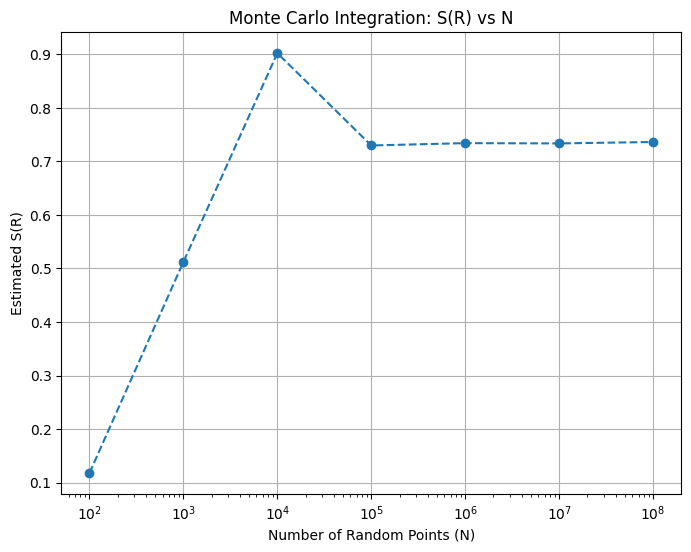

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
a0 = 1.0  # Bohr radius in atomic units
R = 2.0   # Separation distance between the orbitals in atomic units
L = 20.0  # Cube size for integration limits

# Define the psi_2p_z function (as implemented earlier)
def psi_2p_z(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)  # radial distance
    if r == 0:
        return 0
    psi_value = (1 / (4 * np.sqrt(2 * np.pi) * a0**(3/2))) * (r / a0) * np.exp(-r / (2 * a0)) * (z / r)
    return psi_value

# Monte Carlo Integration Function
def monte_carlo_overlap_integral(R, N, L):
    # Generate random points (x, y, z) within the cube [-L, L]
    x = np.random.uniform(-L, L, N)
    y = np.random.uniform(-L, L, N)
    z = np.random.uniform(-L, L, N)

    # Compute the integrand at each random point
    integrand_values = np.array([
        psi_2p_z(x[i], y[i], z[i] + R / 2) * psi_2p_z(x[i], y[i], z[i] - R / 2)
        for i in range(N)
    ])

    # Estimate the average value of the integrand
    average_integrand = np.mean(integrand_values)

    # Compute the volume of the cubic region
    volume = (2 * L) ** 3

    # Estimate the overlap integral S(R)
    S_R = volume * average_integrand
    return S_R

# Perform calculations for various numbers of random points N
N_values = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
S_R_values = []

# Set random seed for reproducibility
np.random.seed(42)

# Loop over different N values
for N in N_values:
    S_R = monte_carlo_overlap_integral(R, N, L)
    S_R_values.append(S_R)
    print(f"Estimated S(R) for N = {N}: {S_R}")

# Plotting S(R) vs N on a logarithmic scale
plt.figure(figsize=(8,6))
plt.plot(N_values, S_R_values, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('Number of Random Points (N)')
plt.ylabel('Estimated S(R)')
plt.title('Monte Carlo Integration: S(R) vs N')
plt.grid(True)
plt.show()


In [20]:
from scipy.stats import expon
import numpy as np

# Plot the integrand and the importance sampling distribution
x = 0
y = 0
z = np.linspace(0, 7, 100)
integrand = psi_2p_z(x, y, z+1) * psi_2p_z(x, y, z-1)
importance_sampling = expon.pdf(z)
plt.figure(figsize=(8, 6))
plt.plot(z, integrand, label='Integrand')
plt.plot(z, importance_sampling, label='Importance Sampling Distribution')
plt.xlabel('z')
plt.ylabel('Value')
plt.title('Integrand and Importance Sampling Distribution')
plt.legend()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()